In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


## Initial shape noise 

In [3]:
# use random uniform value centered around truth

In [47]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_44/interim_samples_441_plus.npz"

In [54]:
ds = load_dataset(fpath)

In [55]:
ds.keys()

dict_keys(['hyper', 'samples', 'truth'])

In [56]:
ds['samples'].keys()

dict_keys(['e2', 'e1'])

In [57]:
e_mag = np.sqrt(ds['samples']['e1'].ravel()**2 + ds['samples']['e2'].ravel()**2)

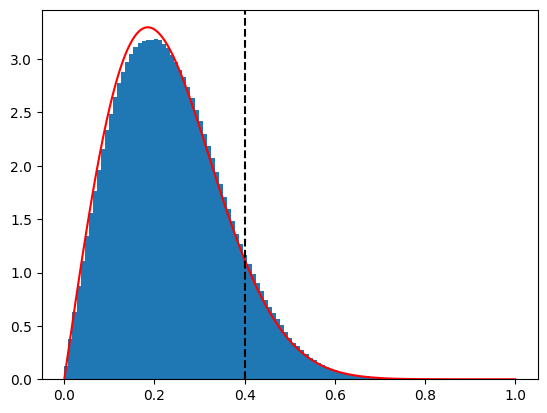

In [68]:
from bpd.prior import ellip_mag_prior
_ = plt.hist(e_mag, bins=101, density=True)

x = np.linspace(0, 1, 10000) 
y = ellip_mag_prior(x, sigma=0.2)
plt.plot(x, y, color='r')

plt.axvline(0.4, ls='--', c='k')


In [ ]:
# an alternative to initialization is to fit the density, but we can defer that for future work

# Shear results 

In [4]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/shear_samples_442_minus.npz"
ds = load_dataset(fpath)

In [6]:
ds.keys()

dict_keys(['samples', 'truth'])

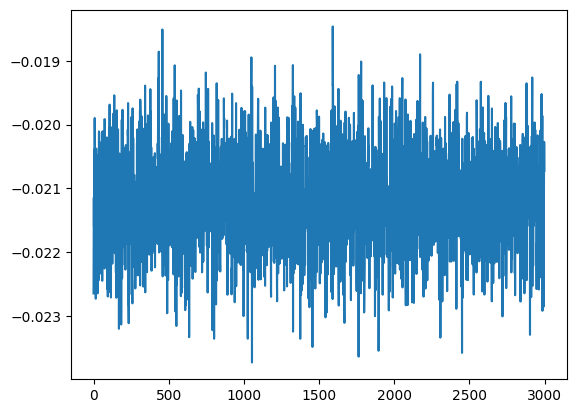

In [7]:
plt.plot(ds['samples']['g1'])

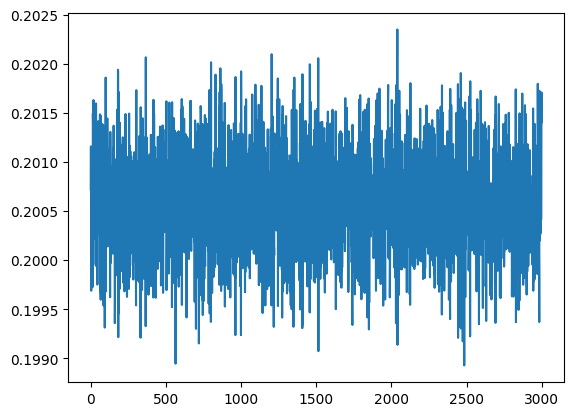

In [8]:
plt.plot(ds['samples']['sigma_e'])

# Bootstraps 

In [9]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/g_samples_boots_443.npz"

In [11]:
ds = load_dataset(fpath)

In [12]:
ds.keys()

dict_keys(['minus', 'plus'])

In [13]:
ds['plus'].keys()

dict_keys(['g2', 'g1', 'sigma_e'])

In [14]:
ds['plus']['g1'].shape, ds['plus']['sigma_e'].shape

((202, 1000), (202, 1000))

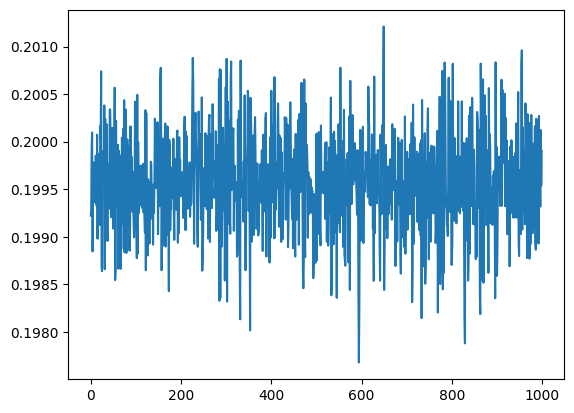

In [15]:
plt.plot(ds['plus']['sigma_e'][5])

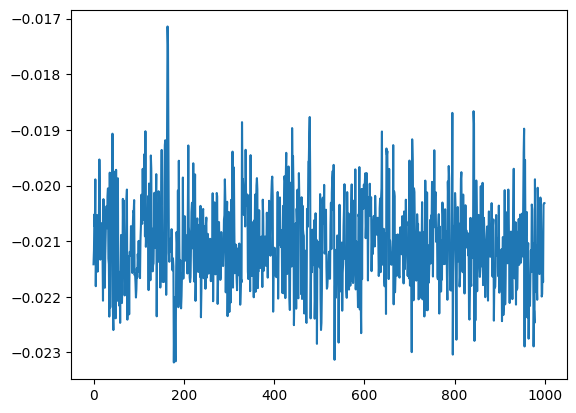

In [16]:
plt.plot(ds['minus']['g1'][0])

In [17]:
gp1 = ds['plus']['g1']
gm1 = ds['minus']['g1']

In [18]:
gp1.shape, gm1.shape

((202, 1000), (202, 1000))

In [19]:
g1 = 0.02

In [20]:
mboot = (
    gp1.mean(axis=1) - gm1.mean(axis=1)
) / 2 / g1 - 1

(array([ 8.,  8., 13., 34., 37., 37., 36., 19.,  8.,  2.]),
 array([0.01684165, 0.01721554, 0.01758943, 0.01796332, 0.01833721,
        0.0187111 , 0.01908499, 0.01945887, 0.01983276, 0.02020665,
        0.02058054]),
 <BarContainer object of 10 artists>)

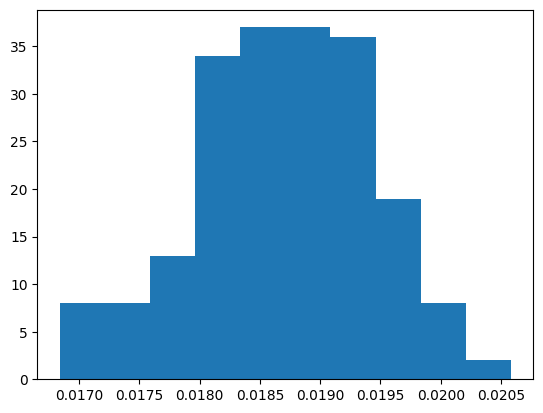

In [21]:
plt.hist(gp1.mean(axis=1))

(array([ 8.,  4., 11., 29., 52., 55., 23., 10.,  6.,  4.]),
 array([-0.00303344, -0.00258045, -0.00212746, -0.00167447, -0.00122148,
        -0.00076849, -0.0003155 ,  0.00013749,  0.00059048,  0.00104347,
         0.00149646]),
 [<matplotlib.patches.Polygon at 0x7f719244cb30>])

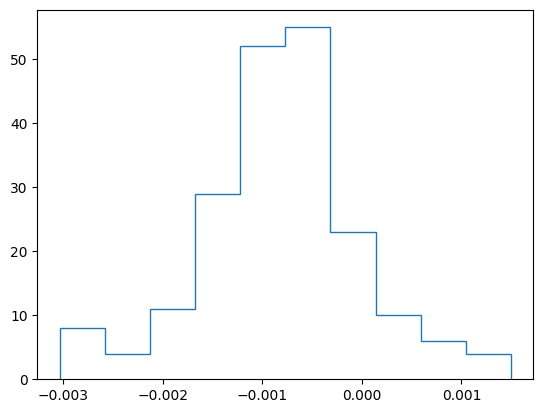

In [22]:
plt.hist(mboot, histtype='step')

In [23]:
mboot.mean(), mboot.std()

(np.float64(-0.0008057393980094626), np.float64(0.0007949594543486603))

In [24]:
mboot.mean() / 1e-3, mboot.std() / 1e-3

(np.float64(-0.8057393980094626), np.float64(0.7949594543486602))

# Alternative method of estimating errors

In [25]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [26]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/g_samples_449_errs.npz"

In [27]:
ds = load_dataset(fpath)

In [35]:
g1p = ds['plus']['g'][:, :, 0]
g1p.shape

(500, 1000)

In [36]:
g1m = ds['minus']['g'][:, :, 0]
g1m.shape

(500, 1000)

In [37]:
m = (g1p.mean(1) - g1m.mean(1)) / 2/ 0.02  - 1
m.shape

(500,)

(array([  3.,  16.,  50., 109., 126., 112.,  61.,  20.,   2.,   1.]),
 array([-0.05437142, -0.04315671, -0.031942  , -0.02072729, -0.00951258,
         0.00170213,  0.01291684,  0.02413155,  0.03534626,  0.04656097,
         0.05777569]),
 <BarContainer object of 10 artists>)

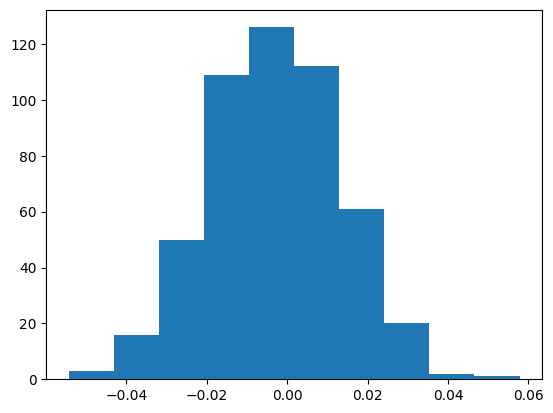

In [38]:
plt.hist(m)

In [41]:
m.mean()  / 1e-3 

np.float64(-2.7576039461028867)

In [42]:
m.std() / np.sqrt(len(m)) / 1e-3

np.float64(0.7354796286959472)